In [1]:
import gensim
import zipfile
import numpy as np
import pandas as pd
from pyarabic import araby
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences


from utils import helper
from evaluator import evaluator
from pretrained.AraVec import AraVec
from utils.tokenizer import tokenization

np.random.seed(0)

In [2]:
def normalize(text):
    text = araby.strip_harakat(text)
    text = araby.strip_tashkeel(text)
    text = araby.strip_small(text)
    text = araby.strip_tatweel(text)
    text = araby.strip_shadda(text)
    text = araby.strip_diacritics(text)
    text = araby.normalize_ligature(text)
    text = araby.normalize_teh(text)
    text = araby.normalize_alef(text)
    return text

def strip_all(text):
    l = [' ', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '?', '.', '.'
       '؟', 'ء', 'ؤ', 'ئ', 'ا', 'ب', 'ت', 'ث',
       'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ',
       'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي', '٠', '١',
       '٢', '٣', '٤', '٥', '٦', '٧', '٨', '٩']
    return "".join([x for x in text if x in l])
def preprocess(text):
    text = normalize(text)
    text = strip_all(text)
    return text


def get_tokens(text):
    return tokenization(text).tokens[0]


In [3]:
train_pos = pd.read_csv("data/train_Arabic_tweets_positive_20190413.tsv", sep='\t', names=["label", "tweet"])
train_neg = pd.read_csv("data/train_Arabic_tweets_negative_20190413.tsv", sep='\t', names=["label", "tweet"])
train = pd.concat([train_pos, train_neg])
test_pos = pd.read_csv("data/train_Arabic_tweets_positive_20190413.tsv", sep='\t', names=["label", "tweet"])
test_neg = pd.read_csv("data/train_Arabic_tweets_negative_20190413.tsv", sep='\t', names=["label", "tweet"])
test = pd.concat([test_pos, test_neg])

train.tweet = train.tweet.apply(preprocess)
test.tweet = test.tweet.apply(preprocess)

data = pd.concat([train, test])
tokens = data.tweet.apply(get_tokens).values

In [4]:
aravec = AraVec()
model_path = aravec.get_model("Twitter_SkipGram_100", unzip=True)
model = aravec.load_model(model_path)

embeddings_index = helper.get_embedding_matrix(model)
wevaluator = evaluator(embeddings_index, preprocess, 100)
scores = wevaluator.evaluate()

Word Analogy (acc):  0.10144927536231885
Word Similarity (MSE):  0.2602355396083907
Concept Categorization (purity):  0.31052141527001864
Epoch 1/5
177/177 [==============================] - 18s 65ms/step - loss: 0.6013 - accuracy: 0.6735 - val_loss: 0.5350 - val_accuracy: 0.7295
Epoch 2/5
177/177 [==============================] - 11s 60ms/step - loss: 0.4576 - accuracy: 0.7860 - val_loss: 0.5098 - val_accuracy: 0.7482
Epoch 3/5
177/177 [==============================] - 11s 60ms/step - loss: 0.3237 - accuracy: 0.8598 - val_loss: 0.5280 - val_accuracy: 0.7564
Epoch 4/5
177/177 [==============================] - 11s 60ms/step - loss: 0.2050 - accuracy: 0.9157 - val_loss: 0.6900 - val_accuracy: 0.7560
Epoch 5/5
177/177 [==============================] - 11s 61ms/step - loss: 0.1179 - accuracy: 0.9563 - val_loss: 0.7919 - val_accuracy: 0.7513
Sentiment Analysis (acc):  0.7513472921636187


In [17]:
with zipfile.ZipFile("pretrained/mottagah.zip", 'r') as zipf:
    zipf.extractall("pretrained/")

In [18]:
model = gensim.models.Word2Vec.load("pretrained/mottagah/mottagah")

embeddings_index = helper.get_embedding_matrix(model)
wevaluator = evaluator(embeddings_index, preprocess, 300)
scores = wevaluator.evaluate()

Word Analogy (acc):  0.13043478260869565
Word Similarity (MSE):  0.3292717506104365
Concept Categorization) (purity):  0.313780260707635
Epoch 1/5
177/177 [==============================] - 39s 180ms/step - loss: 0.6015 - accuracy: 0.6657 - val_loss: 0.5314 - val_accuracy: 0.7234
Epoch 2/5
177/177 [==============================] - 31s 173ms/step - loss: 0.4047 - accuracy: 0.8157 - val_loss: 0.5122 - val_accuracy: 0.7537
Epoch 3/5
177/177 [==============================] - 30s 172ms/step - loss: 0.1996 - accuracy: 0.9214 - val_loss: 0.6474 - val_accuracy: 0.7431
Epoch 4/5
177/177 [==============================] - 31s 173ms/step - loss: 0.1093 - accuracy: 0.9602 - val_loss: 0.7887 - val_accuracy: 0.7452
Epoch 5/5
177/177 [==============================] - 31s 177ms/step - loss: 0.0667 - accuracy: 0.9754 - val_loss: 0.9223 - val_accuracy: 0.7438
Sentiment Analysis (acc):  0.7437936213446418


In [8]:
helper.save_embeddings(embeddings_index, "mottagah.pkl")

In [2]:
embeddings_index = helper.load_embeddings("mottagah.pkl")

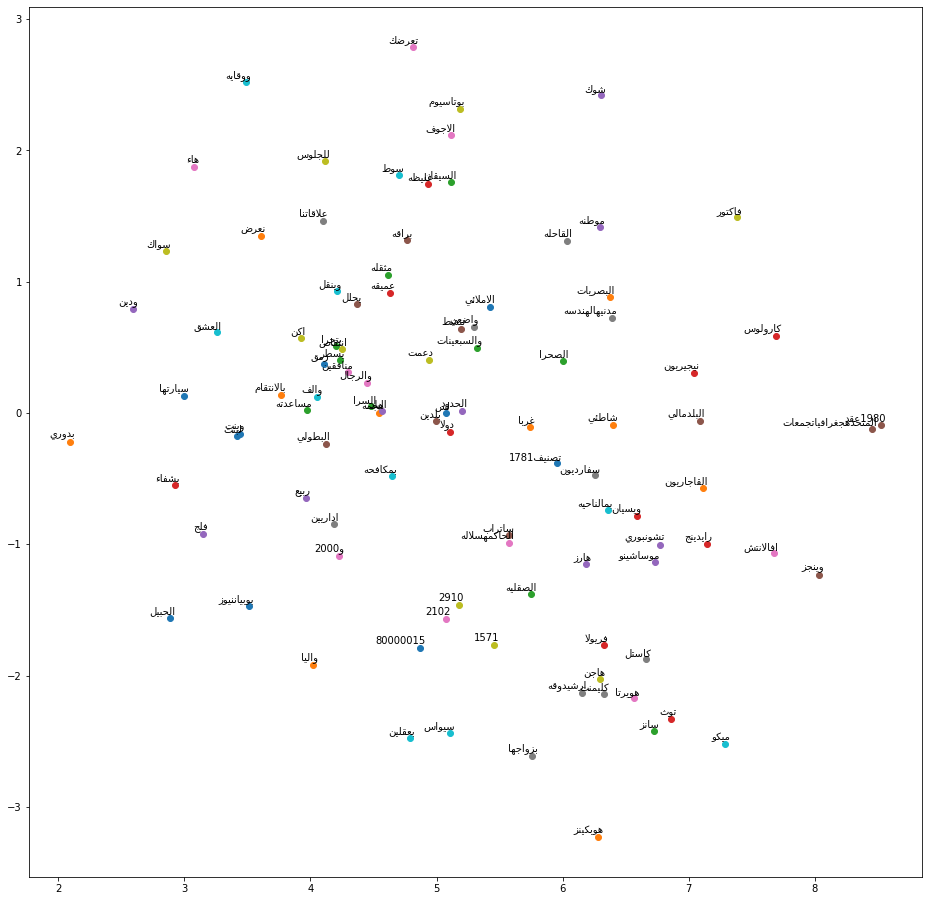

In [6]:
helper.plot(embeddings_index, 'mottagah')

In [5]:
model.wv.most_similar("كوفيد")

[('١٩', 0.6374679207801819),
 ('المستجد', 0.6315629482269287),
 ('19', 0.6102045774459839),
 ('كوفيد19', 0.5951632261276245),
 ('لكوفيد', 0.5279813408851624),
 ('فيروس', 0.5156537890434265),
 ('كوروناالمستجد', 0.509548008441925),
 ('مرض', 0.4992513060569763),
 ('كورنا', 0.4914577603340149),
 ('كرونا', 0.48930028080940247)]

In [4]:
word2vec_model_sg = gensim.models.Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=1, workers=4, seed=0, sg=1)
word2vec_model_sg.build_vocab(tokens) 
word2vec_model_sg.train(tokens, total_examples=word2vec_model_sg.corpus_count, epochs=5)

embeddings_index = helper.get_embedding_matrix(word2vec_model_sg)
wevaluator = evaluator(embeddings_index, preprocess, 100)
scores = wevaluator.evaluate()

Word Analogy (acc):  0.021739130434782608
Word Similarity (MSE):  0.37766943941602377
Concept Categorization) (purity):  0.12243947858472998
Epoch 1/5
177/177 [==============================] - 17s 66ms/step - loss: 0.6217 - accuracy: 0.6406 - val_loss: 0.5601 - val_accuracy: 0.6974
Epoch 2/5
177/177 [==============================] - 10s 57ms/step - loss: 0.4676 - accuracy: 0.7739 - val_loss: 0.4871 - val_accuracy: 0.7585
Epoch 3/5
177/177 [==============================] - 10s 57ms/step - loss: 0.2605 - accuracy: 0.8936 - val_loss: 0.5334 - val_accuracy: 0.7566
Epoch 4/5
177/177 [==============================] - 10s 57ms/step - loss: 0.1377 - accuracy: 0.9496 - val_loss: 0.6549 - val_accuracy: 0.7564
Epoch 5/5
177/177 [==============================] - 10s 57ms/step - loss: 0.0810 - accuracy: 0.9712 - val_loss: 0.7855 - val_accuracy: 0.7631
Sentiment Analysis (acc):  0.7630532732573548


In [5]:
from models.Word2Vec import Word2Vec

sentence_inds, vocab, num_tokens, word_index, index_word = helper.encode_tokens(tokens)
embedding_dims = 100
word2vec_model = Word2Vec()
model = word2vec_model.train(sentence_inds, window_size=5, vocab_size=num_tokens+1, vector_dim=embedding_dims, lr=0.05, negative_samples=2, batch_size=2048, epochs=5, verbose=1)
embeddings_index = helper.get_embedding_matrix(model, index_word)    
wevaluator = evaluator(embeddings_index, preprocess, embedding_dims)
scores = wevaluator.evaluate()

Epoch 1/5
5148/5148 [==============================] - 21s 4ms/step - loss: 0.0362
Epoch 2/5
5148/5148 [==============================] - 21s 4ms/step - loss: 0.0170
Epoch 3/5
5148/5148 [==============================] - 21s 4ms/step - loss: 0.0128
Epoch 4/5
5148/5148 [==============================] - 21s 4ms/step - loss: 0.0129
Epoch 5/5
5148/5148 [==============================] - 21s 4ms/step - loss: 0.0134
Word Analogy (acc):  0.028985507246376812
Word Similarity (MSE):  0.5819037982332124
Concept Categorization) (purity):  0.12523277467411545
Epoch 1/5
177/177 [==============================] - 16s 65ms/step - loss: 0.5805 - accuracy: 0.6667 - val_loss: 0.4929 - val_accuracy: 0.7369
Epoch 2/5
177/177 [==============================] - 10s 57ms/step - loss: 0.3084 - accuracy: 0.8728 - val_loss: 0.5219 - val_accuracy: 0.7517
Epoch 3/5
177/177 [==============================] - 10s 57ms/step - loss: 0.1438 - accuracy: 0.9464 - val_loss: 0.6549 - val_accuracy: 0.7484
Epoch 4/5
177/17

In [6]:
from models.Glove import Glove

sentence_inds, vocab, num_tokens, word_index, index_word = helper.encode_tokens(tokens)
    
gmodel = Glove()
model = gmodel.train(sentence_inds, num_tokens, 100, 5, 5, 2048)
embeddings_index = helper.get_embedding_matrix(model, index_word)
wevaluator = evaluator(embeddings_index, preprocess, 100)
scores = wevaluator.evaluate()

Epoch 1/5
653/653 [==============================] - 45s 68ms/step - loss: 0.1491
Epoch 2/5
653/653 [==============================] - 45s 69ms/step - loss: 0.0878
Epoch 3/5
653/653 [==============================] - 45s 68ms/step - loss: 0.0546
Epoch 4/5
653/653 [==============================] - 45s 70ms/step - loss: 0.0358
Epoch 5/5
653/653 [==============================] - 45s 68ms/step - loss: 0.0257
Word Analogy (acc):  0.028985507246376812
Word Similarity (MSE):  0.5608709344595465
Concept Categorization) (purity):  0.12476722532588454
Epoch 1/5
177/177 [==============================] - 15s 62ms/step - loss: 0.6030 - accuracy: 0.6540 - val_loss: 0.5132 - val_accuracy: 0.7263
Epoch 2/5
177/177 [==============================] - 11s 59ms/step - loss: 0.3567 - accuracy: 0.8468 - val_loss: 0.5260 - val_accuracy: 0.7516
Epoch 3/5
177/177 [==============================] - 10s 59ms/step - loss: 0.1640 - accuracy: 0.9395 - val_loss: 0.6743 - val_accuracy: 0.7374
Epoch 4/5
177/177 [==

In [12]:
from models.FastText import FastText

a2c = {'pos': 0, 'neg' : 1}
y = np.array([a2c[a] for a in data.label])
y = to_categorical(y)

maxlen = 128

fmodel = FastText()
embedding_dims = 100
docs = list(data.tweet.values)
docs = fmodel.create_docs(docs, n_gram_max=2)
docs = [araby.tokenize(i) for i in docs]
sentence_inds, vocab, num_tokens, word_index, index_word = helper.encode_tokens(docs)
sentence_inds = pad_sequences(sequences=sentence_inds, maxlen=maxlen, padding='post', truncating='post')
sentence_inds = np.array(sentence_inds)
input_dim = np.max(sentence_inds) + 1


model = fmodel.train(sentence_inds, y, input_dim)
embeddings_index = helper.get_embedding_matrix(model, index_word)    
wevaluator = evaluator(embeddings_index, preprocess, embedding_dims)
scores = wevaluator.evaluate() #Sentiment analysis score has a data leak -- is useless here

Epoch 1/5
496/496 [==============================] - 30s 54ms/step - loss: 0.4504 - accuracy: 0.7732 - val_loss: 0.3200 - val_accuracy: 0.8568
Epoch 2/5
496/496 [==============================] - 26s 52ms/step - loss: 0.1843 - accuracy: 0.9258 - val_loss: 0.2523 - val_accuracy: 0.9000
Epoch 3/5
496/496 [==============================] - 25s 50ms/step - loss: 0.0921 - accuracy: 0.9631 - val_loss: 0.2634 - val_accuracy: 0.9096
Epoch 4/5
496/496 [==============================] - 25s 50ms/step - loss: 0.0592 - accuracy: 0.9758 - val_loss: 0.3052 - val_accuracy: 0.9149
Word Analogy (acc):  0.007246376811594203
Word Similarity (MSE):  0.6208373497168335
Concept Categorization) (purity):  0.1270949720670391
Epoch 1/5
177/177 [==============================] - 16s 64ms/step - loss: 0.2846 - accuracy: 0.8928 - val_loss: 0.2104 - val_accuracy: 0.9183
Epoch 2/5
177/177 [==============================] - 10s 59ms/step - loss: 0.1315 - accuracy: 0.9510 - val_loss: 0.2249 - val_accuracy: 0.9115
Epo

In [4]:
fasttext_model = gensim.models.FastText(sentences=tokens, vector_size=100, window=5, min_count=1, workers=4, seed=0)
fasttext_model.build_vocab(tokens) 
fasttext_model.train(tokens, total_examples=fasttext_model.corpus_count, epochs=5)

embeddings_index = helper.get_embedding_matrix(fasttext_model)
wevaluator = evaluator(embeddings_index, preprocess, 100)
scores = wevaluator.evaluate()

Word Analogy (acc):  0.021739130434782608
Word Similarity (MSE):  0.39865405146552174
Concept Categorization) (purity):  0.1196461824953445
Epoch 1/5
177/177 [==============================] - 16s 64ms/step - loss: 0.6309 - accuracy: 0.6306 - val_loss: 0.5904 - val_accuracy: 0.6780
Epoch 2/5
177/177 [==============================] - 10s 58ms/step - loss: 0.5390 - accuracy: 0.7256 - val_loss: 0.5262 - val_accuracy: 0.7240
Epoch 3/5
177/177 [==============================] - 10s 58ms/step - loss: 0.3959 - accuracy: 0.8174 - val_loss: 0.5265 - val_accuracy: 0.7349
Epoch 4/5
177/177 [==============================] - 10s 58ms/step - loss: 0.2276 - accuracy: 0.9081 - val_loss: 0.6332 - val_accuracy: 0.7516
Epoch 5/5
177/177 [==============================] - 10s 58ms/step - loss: 0.1199 - accuracy: 0.9551 - val_loss: 0.7531 - val_accuracy: 0.7409
Sentiment Analysis (acc):  0.7409223429631593
